assign pictures in 12 channel. It is 512 nm wavelength.


In [1]:
%matplotlib inline
from decimal import Decimal
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu, normaltest, norm
from scipy.stats import bootstrap
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import shutil
import random

rng = np.random.default_rng()
# A few helper functions:
#from utils import *

from statannot import add_stat_annotation
#from pandas.compat import StringIO

sns.set(style="whitegrid")

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

from statannotations.Annotator import Annotator

In [19]:
#for AO
def make_a_graph_with_order(data, y, x, title, stat_test):
    medians = data.groupby(by=[x], sort=False)[y].median() 
    std = data.groupby(by=[x], sort=False)[y].std() 
    
    my_order = medians.index
    palette = ['black']
    
    #Plot figure
    ###############################################################################################
    plt.figure(figsize=(20, 20))
    sns.set_context("paper", rc={"font.size":50,"axes.titlesize":50,"axes.labelsize":25})
    
    ###############################################################################################
    #draw dots
    bplot = sns.stripplot(y=y, x=x,  size=15,
                data=data, palette="rocket",hue="Cell")
      
    #draw errorbars 1sigma
    bplot = sns.pointplot(y=y, x=x, 
                 data=data,
                 join=False,
                 errorbar=("sd", 1), 
                 n_boot=5000, seed=10,  #unused for sd
                 errwidth=5,
                 capsize=0.1,
                 scale=0,
                 palette = ['#929591']
                 )
    
    
    bplot = sns.violinplot(y=y, x=x, 
                 data=data, 
                 #hue="date",
                 #capsize=0.1,
                 #scale=0,
                 bw=1.2,
                 #cut=1,
                 inner=None,#,size=20,
                 palette = ['#E6E6FA', '#E6E6FA','#FFFF00',
                            '#FFFF00', '#FFFF00', '#FFFF00',]
                )
            
    #draw meanline
    sns.pointplot(y=y, x=x, data=data, join=False, ci=0, capsize=0.3, scale=0, errwidth=5, palette = ['#929591']) #hue="date", dodge=0.45, linewidth`, `markersize instead of scale
    
    #draw curve line
    # df_wide = data.pivot_table(index="Experiment", columns="Cell", values="Nuc/cyto TFEB-GFP fluorescence",sort=False)
    # bplot = sns.lineplot(df_wide, palette="rocket",dashes=False,legend=False,sizes=(105, 205))    
    
    # '#e41a1c', '#4daf4a', '#377eb8' RGB
    # '#377eb8', '#ff7f00', '#4daf4a', Blue Orange Green
    # '#f781bf', '#a65628', '#984ea3', violet
    # '#999999', '#e41a1c', '#dede00' grey red yellow
    # inner{“box”, “quartile”, “point”, “stick”, None}, optional
    # Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. 
    # If point or stick, show each underlying datapoint. Using None will draw unadorned violins.
    
    
    #########################################################################################################################
    #Customize labels
    #########################################################################################################################
    #not show X column name
    bplot.set_xlabel(str(x), fontsize=0)
    bplot.set_ylabel(str(y), fontsize=40)
    
    bplot.tick_params(labelsize=40)
    bplot.set_xticklabels(bplot.get_xticklabels(), rotation=30, fontsize=40)
    bplot.legend(fontsize=25,markerscale=3,loc='upper right')
    bplot.set_title("After overnight incubation under LED panel", fontsize=60, pad=15)
 
    bplot.set_ylim(-0.05, 5)

    #########################################################################################################################
    #draw number of experiments, mean, 
    N = data.groupby(by=[x], sort=False).size() 
    plt.text(-0.7, -1.15, 'median', fontsize=40) 
    plt.text(-0.7, -1.4, 'N cells', fontsize=40)

    for i, grp in enumerate(my_order):
        plt.text(i, -1.4, f"{N[grp]}", fontsize=40, ha="center")
        plt.text(i, -1.15, f"{medians[grp]:.1f}", fontsize=40, ha="center")

    #########################################################################################################################    

   
        #Stars
    #########################################################################################################################
    box_pairs=[('before LED', 'after LED ON'),
               ]
    
    #['full', 'simple', 'star'] for argument `text_format`
    #t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    
    # build the annotator on the same axes you plotted to
    annotator = Annotator(
        ax=bplot,
        pairs=box_pairs,
        data=data,
        x=x,
        y=y,
        order=my_order
    )

    annotator.configure(
        test=stat_test,         # e.g. "t-test_ind"
        text_format='star',     # keeps your star notation
        comparisons_correction=None,
        loc='inside',           # same placement
        fontsize=60
    )
    annotator.apply_and_annotate()
    

    # rect = patches.Rectangle(
    # (1, -0.85),    # lower‐left corner at x=1.2, y=0.5
    # width=4,
    # height=0.1,
    # linewidth=1,
    # edgecolor="#515151",
    # facecolor="#E0E000FF",
    # alpha=1,      # semi-transparent fill
    # clip_on=False
    # )

    # bplot.text(
    # 2.5, -0.73,                
    # "Light ON",     
    # fontsize=40,         
    # color="black",
    # )

    # bplot.add_patch(rect)


    leg = bplot.get_legend()
    if leg:
        leg.remove()

    print('####')
    print(medians)
    print('####')
    print('####')
    print(my_order)
    print('####')




In [3]:
df = pd.read_excel('../data/03_14/LED/before/before_after_LED_f.xlsx')
df['Experiment'] = df['Experiment'].astype(str)

C:\Users\lliza\AppData\Local\Temp\ipykernel_30092\615045340.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bplot = sns.pointplot(y=y, x=x,
C:\Users\lliza\AppData\Local\Temp\ipykernel_30092\615045340.py:20: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  bplot = sns.pointplot(y=y, x=x,
C:\Users\lliza\AppData\Local\Temp\ipykernel_30092\615045340.py:20: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  bplot = sns.pointplot(y=y, x=x,
C:\Users\lliza\AppData\Local\Temp\ipykernel_30092\615045340.py:20: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line be

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

before LED vs. after LED ON: t-test independent samples, P_val:3.115e-02 t=-2.165e+00
####
Experiment
before LED      0.585815
after LED ON    1.117076
Name: Nuc/cyto TFEB-GFP fluorescence, dtype: float64
####
####
Index(['before LED', 'after LED ON'], dtype='object', name='Experiment')
####


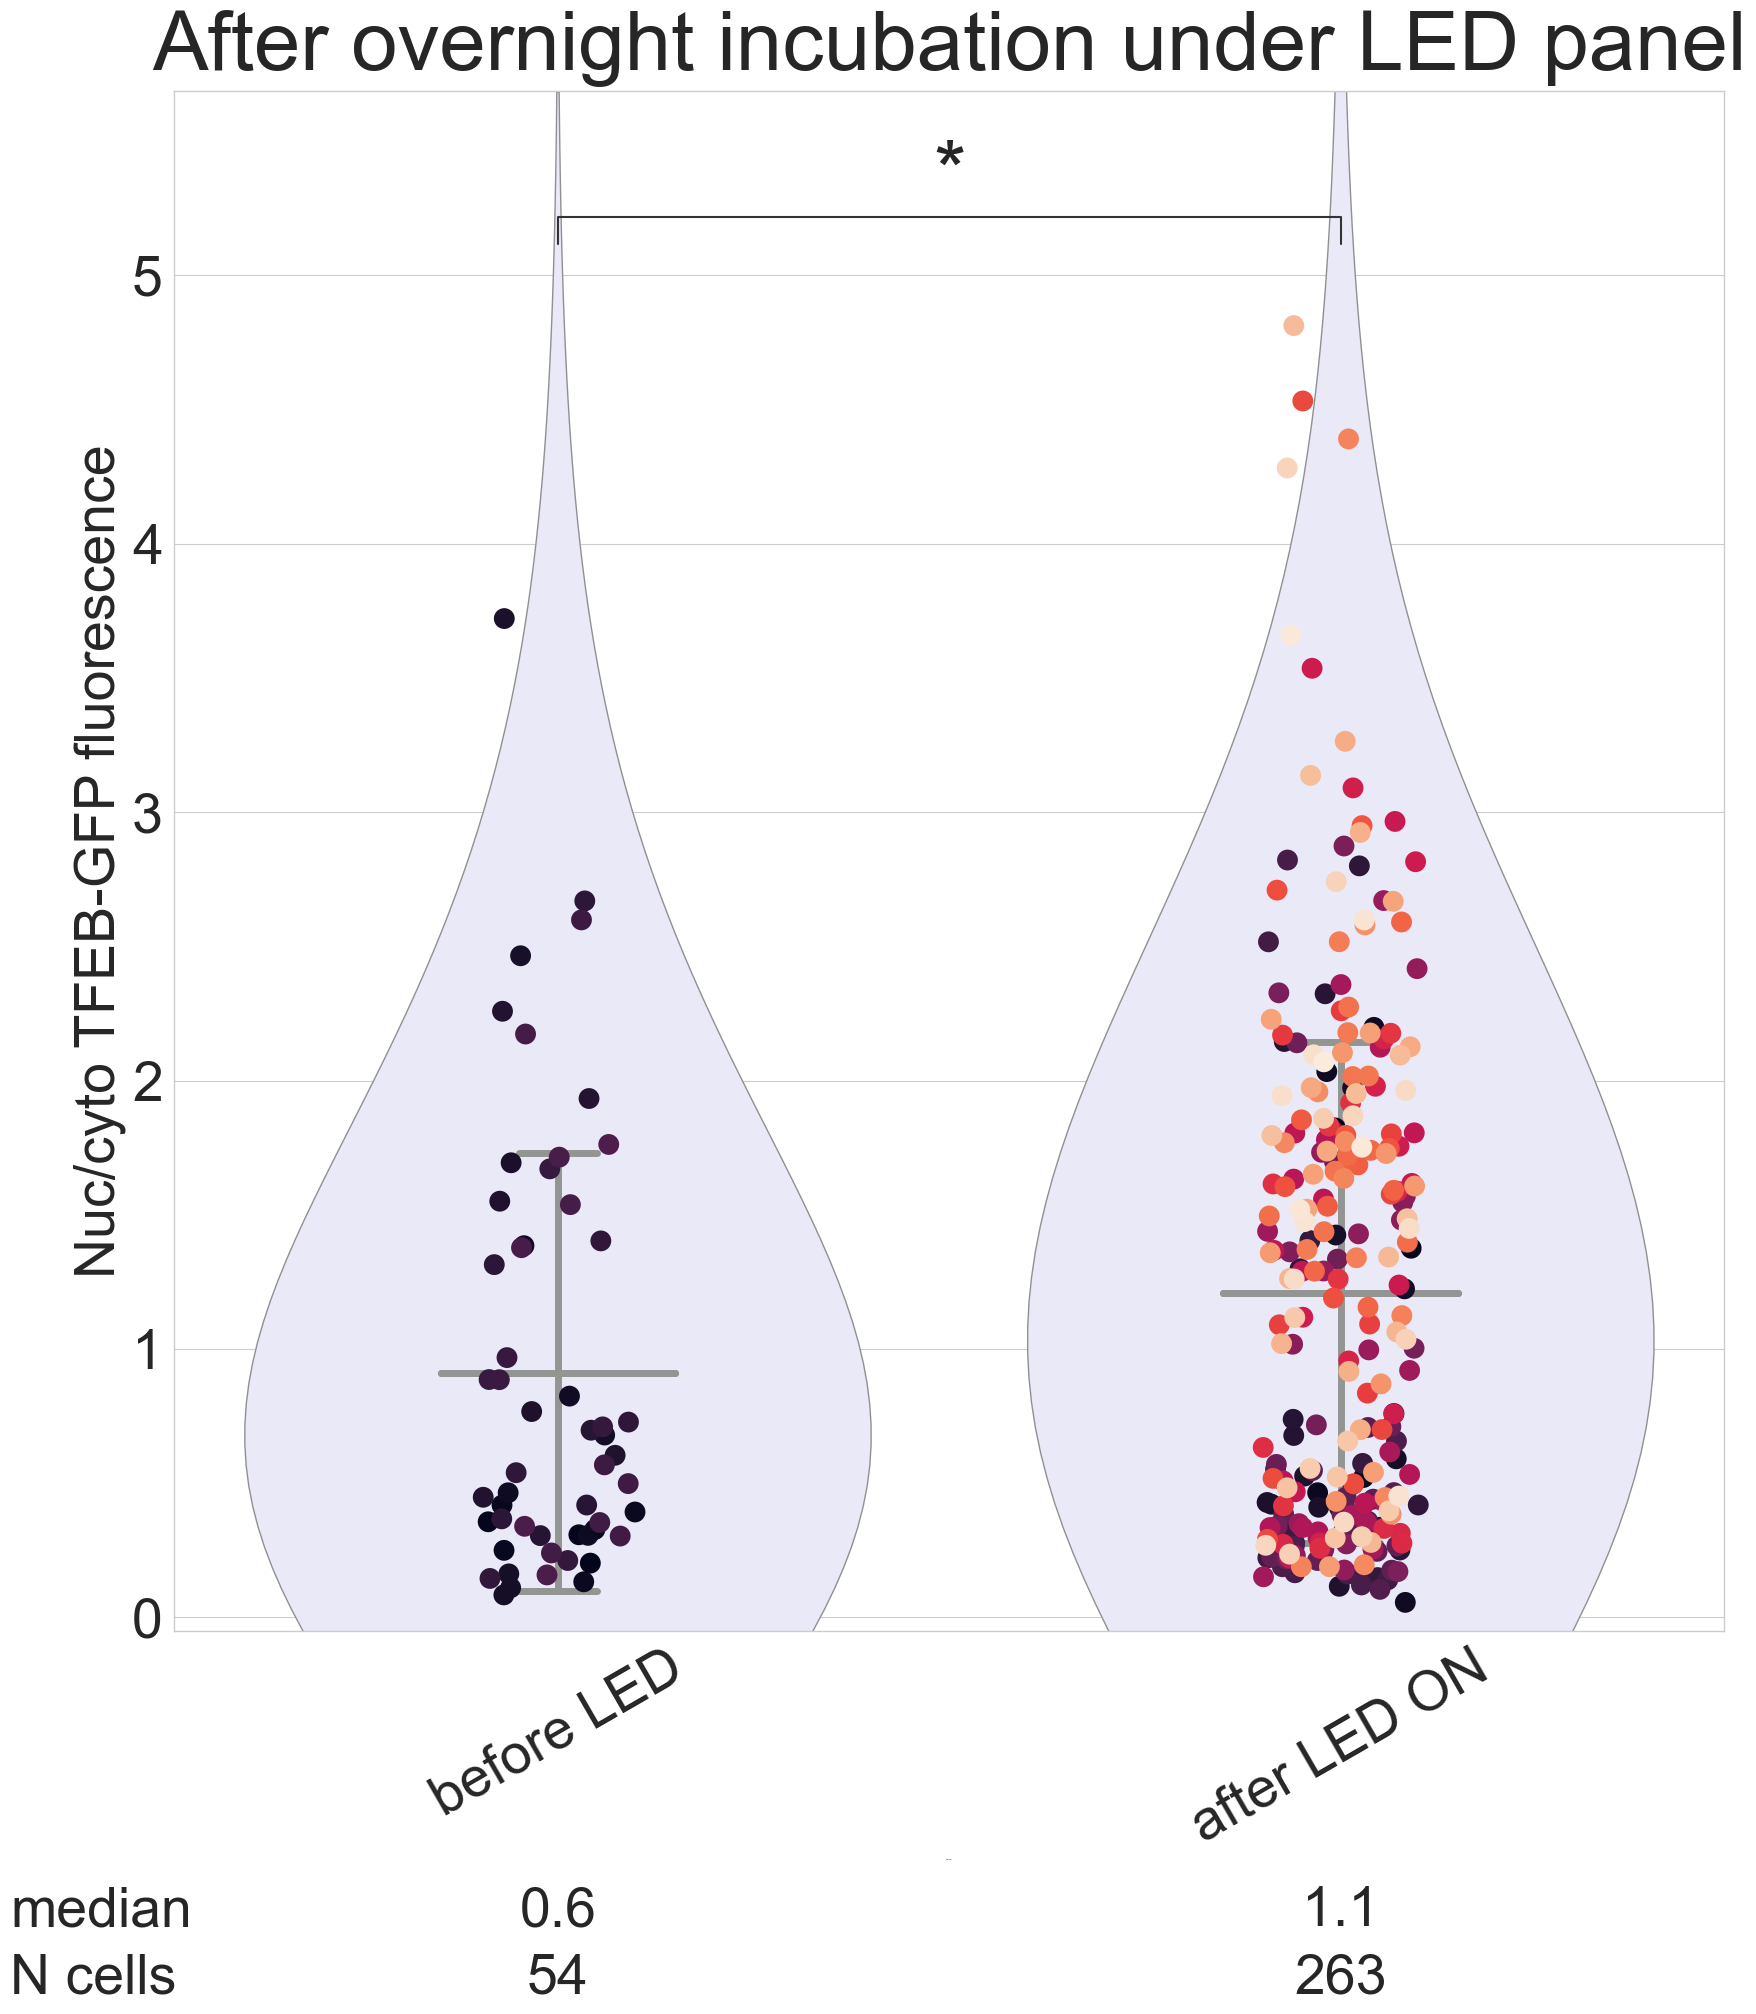

In [20]:
make_a_graph_with_order(df, "Nuc/cyto TFEB-GFP fluorescence", 'Experiment', '','t-test_ind')
plt.savefig('../data/03_14/LED/before/before_after_LED.jpg', bbox_inches = "tight", dpi=300) 